# Lesson 3 Codealong
Instructor: Amy Roberts, PhD

In [1]:
#General imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Part 1. Basic Stats
	
    Methods available include: 
		.min() - Compute minimum value
		.max() - Compute maximum value
		.mean() - Compute mean value
		.median() - Compute median value
        .mode() - Compute mode value(s)
		.count() - Count the number of observations

#### Read in the examples

In [2]:
df = pd.DataFrame({'example1' : [18, 24, 17, 21, 24, 16, 29, 18], 'example2' : [55, 47, 38, 66, 56, 64, 44, 39], 'example3': [83, 70,  4, 36,  7, 50,  6, 23] })
print df


   example1  example2  example3
0        18        55        83
1        24        47        70
2        17        38         4
3        21        66        36
4        24        56         7
5        16        64        50
6        29        44         6
7        18        39        23


#### Instructor example: Calculate the mean for each coloumn

In [5]:
df.mean()

example1    20.875
example2    51.125
example3    34.875
dtype: float64

#### Students: Calculate median, mode, max, min for example

Note: All answers should match your hand calculations

In [6]:
df.max()

example1    29
example2    66
example3    83
dtype: int64

In [7]:
df.min()

example1    16
example2    38
example3     4
dtype: int64

In [8]:
df.median()

example1    19.5
example2    51.0
example3    29.5
dtype: float64

In [9]:
df.mode() #column one is bimodal so returns NANs for that column for the level of mode showin in other columns

,example1,example2,example3
0,18.0,38,4
1,24.0,39,6
2,NaN,44,7
3,NaN,47,23
4,NaN,55,36
5,NaN,56,50
6,NaN,64,70
7,NaN,66,83


### Part 2. Box Plot

#### Instructor: Interquartile range 

In [10]:
print "50% Quartile:"
print df.quantile(.50) #note quantile
print "Median (red line of the box)"
print df.median()

50% Quartile:
example1    19.5
example2    51.0
example3    29.5
Name: 0.5, dtype: float64
Median (red line of the box)
example1    19.5
example2    51.0
example3    29.5
dtype: float64


In [11]:
print"25% (bottome of the box)"
print df.quantile(0.25)
print"75% (top of the box)"
print df.quantile(0.75)

25% (bottome of the box)
example1    17.75
example2    42.75
example3     6.75
Name: 0.25, dtype: float64
75% (top of the box)
example1    24.0
example2    58.0
example3    55.0
Name: 0.75, dtype: float64


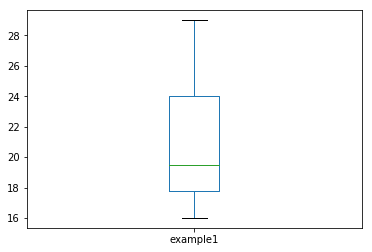

In [12]:
df['example1'].plot(kind='box')

#### Student: Create plots for examples 2 and 3 and check the quartiles

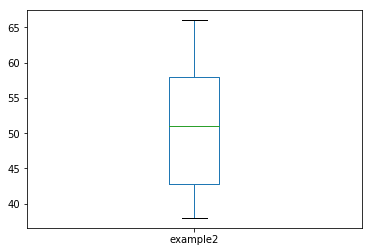

In [13]:
df['example2'].plot(kind='box')

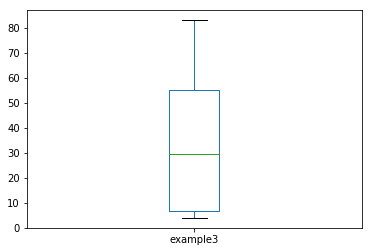

In [14]:
df['example3'].plot(kind='box')

#### What does the cross in example 2 represent?

Answer: Interquartile range.

### Part 3. Standard Deviation and Variance

**Variance:** The variance is how much the predictions for a given point vary between different realizations of the model.

**Standard Deviation:** The square root of the variance

<img(src='../../assets/images/biasVsVarianceImage.png', style="width: 30%; height: 30%")>

#### In Pandas
	Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

#### Let's calculate variance by hand first. 
<img(src='../../assets/images/samplevarstd.png', style="width: 50%; height: 50%")>

In [15]:
#example1
mean = df["example1"].mean()
n= df["example1"].count()

print df["example1"]
print mean
print n


0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: example1, dtype: int64
20.875
8


In [16]:
# written out by hand for instructional purposes 
#if there is time, have the students refactor this to create a function to calculate variance for any dataset
#find the squared distance from the mean

#variance = sum([(i - mean_value)**2 for i in lst])

obs0 = (18 - mean)**2
obs1 = (24 - mean)**2
obs2 = (17 - mean)**2
obs3 = (21 - mean)**2
obs4 = (24 - mean)**2
obs5 = (16 - mean)**2
obs6 = (29 - mean)**2
obs7 = (18 - mean)**2

print obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7

#sum each observation's squared distance from the mean 
numerator = obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 +obs7
denominator = n - 1
variance = numerator/denominator
print numerator 
print denominator
print variance



8.265625 9.765625 15.015625 0.015625 9.765625 23.765625 66.015625 8.265625
140.875
7
20.125


In [11]:
# in pandas
print "Variance"
print df["example1"].var()

Variance
20.125


#### Students: Calculate the standard deviation by hand for each sample

Recall that the standard deviation is the square root of the variance. 

In [28]:
from math import sqrt

def calculate_sigma(column):
    n = len(column) 
    mean_value = sum(column) / float(len(column))
    variance = sum([(i - mean_value)**2 for i in column]) / n
    sigma = sqrt(variance)
    return(sigma)

In [29]:
#calculate standard deviation by hand
example1 = df['example1']

In [30]:
calculate_sigma(example1)

4.19635258289863

#### Short Cut!

In [12]:
df.describe()

,example1,example2
count,8.00000,8.000000
mean,20.87500,51.125000
std,4.48609,10.776131
min,16.00000,38.000000
25%,17.75000,42.750000
50%,19.50000,51.000000
75%,24.00000,58.000000
max,29.00000,66.000000


#### Student: Check understanding 
Which value in the above table is the median? 

Answer: 

### Part 4: Correlation

## df.corr()